# Loan Application Status Prediction

### Problem Statement

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [40]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv("Loan Application Status Prediction.csv")

In [66]:
pd.set_option('display.max_rows',None)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [67]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [69]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [314]:
df.shape

(614, 13)

The dataset contains :

Number of columns = 13

number of rows = 614

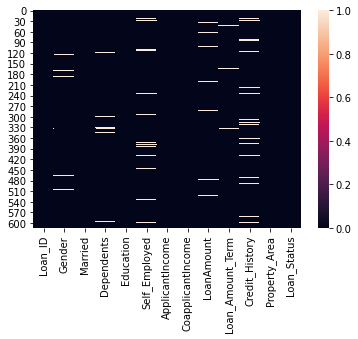

In [70]:
plt.figure(figsize = [6,4])
sns.heatmap(df.isnull())

Some Null Values are present in Gender,Married,Dependents,Self Employed ,Laon Amount,Credit History and Loan Amount Term  ,so we have to deal with them.

In [71]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [72]:
#missing values  of categorical variables

In [73]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode())

In [74]:
df["Gender"].isnull().sum()

13

In [75]:
df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17     Female
18       Male
19       Male
20       Male
21       Male
22       Male
23        NaN
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
30       Male
31       Male
32       Male
33       Male
34       Male
35       Male
36       Male
37     Female
38       Male
39       Male
40       Male
41       Male
42       Male
43       Male
44       Male
45     Female
46       Male
47       Male
48     Female
49     Female
50     Female
51     Female
52     Female
53       Male
54     Female
55       Male
56       Male
57       Male
58       Male
59       Male
60       Male
61       Male
62       Male
63       Male
64     Female
65       Male
66       Male
67       Male
68       Male
69     Female
70       Male
71    

In [76]:
#using mode value to replace NaN values

In [77]:
df["Gender"].mode()

0    Male
dtype: object

In [81]:
df["Gender"] = df["Gender"].fillna("Male")

In [82]:
df["Gender"].isnull().sum()

0

In [83]:
df["Gender"]

0        Male
1        Male
2        Male
3        Male
4        Male
5        Male
6        Male
7        Male
8        Male
9        Male
10       Male
11       Male
12       Male
13       Male
14       Male
15       Male
16       Male
17     Female
18       Male
19       Male
20       Male
21       Male
22       Male
23       Male
24       Male
25       Male
26       Male
27       Male
28       Male
29     Female
30       Male
31       Male
32       Male
33       Male
34       Male
35       Male
36       Male
37     Female
38       Male
39       Male
40       Male
41       Male
42       Male
43       Male
44       Male
45     Female
46       Male
47       Male
48     Female
49     Female
50     Female
51     Female
52     Female
53       Male
54     Female
55       Male
56       Male
57       Male
58       Male
59       Male
60       Male
61       Male
62       Male
63       Male
64     Female
65       Male
66       Male
67       Male
68       Male
69     Female
70       Male
71    

In [84]:
df["Married"].mode()

0    Yes
dtype: object

In [85]:
df["Married"] = df["Married"].fillna("Yes")

In [86]:
df["Dependents"].mode()

0    0
dtype: object

In [110]:
df["Dependents"] = df["Dependents"].replace(0,"0")

In [111]:
df["Dependents"]

0       0
1       1
2       0
3       0
4       0
5       2
6       0
7      3+
8       2
9       1
10      2
11      2
12      2
13      0
14      2
15      0
16      1
17      0
18      0
19      0
20      0
21      1
22      0
23      2
24      1
25      0
26      0
27      2
28      0
29      2
30      1
31      0
32      1
33      0
34     3+
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      2
54      1
55      2
56      0
57      0
58      1
59      2
60      0
61     3+
62      0
63      1
64      0
65      0
66      0
67      1
68     3+
69      0
70      0
71      2
72      0
73     3+
74     3+
75      0
76      0
77      1
78     3+
79     3+
80      0
81      1
82      2
83      0
84      1
85      0
86      2
87      0
88      0
89      0
90      0
91      2
92      2
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [89]:
df["Self_Employed"].mode()

0    No
dtype: object

In [90]:
df["Self_Employed"] = df["Self_Employed"].fillna("No")

In [91]:
df["Credit_History"].mode()

0    1.0
dtype: float64

In [92]:
df["Credit_History"] = df["Credit_History"].fillna(1.0)

In [93]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
#missing values removal for continous values

In [95]:
#checking distribution

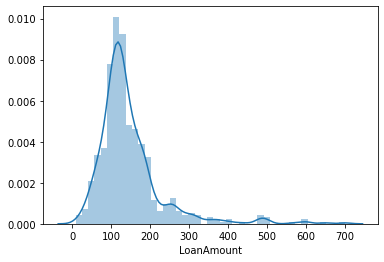

In [96]:
sns.distplot(df['LoanAmount'],kde = True)

Observation:

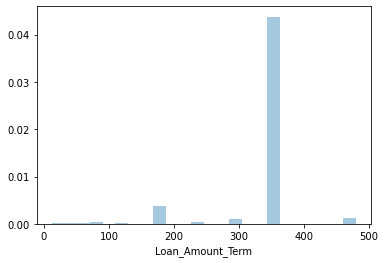

In [97]:
sns.distplot(df['Loan_Amount_Term'],kde = True)

In [99]:
df["LoanAmount"] = df["LoanAmount"].replace(np.NaN,df["LoanAmount"].median())

In [100]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].replace(np.NaN,df["Loan_Amount_Term"].median())

In [101]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values are replaced.

In [102]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.739414,342.410423,0.855049
std,6109.041673,2926.248369,84.110608,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [103]:
#visualization of features

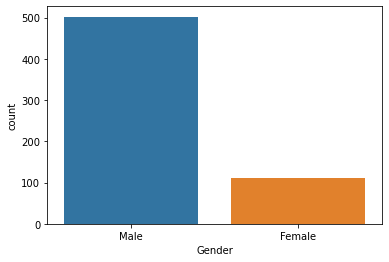

In [104]:
sns.countplot(df['Gender'])

observations : The number of males applied for loans are very high than females.

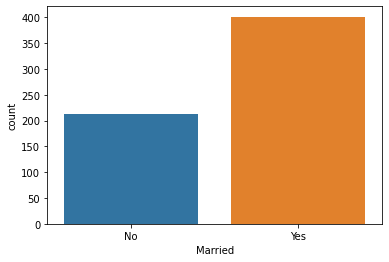

In [106]:
sns.countplot(df['Married'])

Observations : the number of married indivisuals applied for loans are double the the number of unmarried indivisuals.

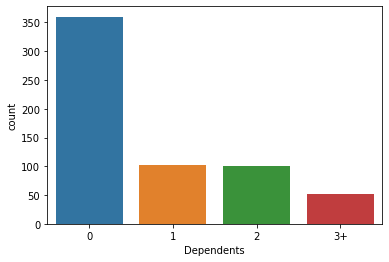

In [112]:
sns.countplot(df['Dependents'])

observation : most of the indivisuals ,who has applied for loan are not dependent.

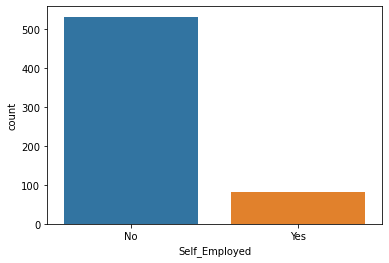

In [113]:
sns.countplot(df['Self_Employed'])

observation : indivisuals who are self employed and applied for loans are almost equals to 100.

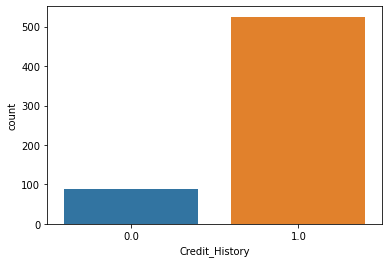

In [114]:
sns.countplot(df['Credit_History'])

Obervation : More than 500 indivisuals have been provided with loan.

In [141]:
# Checking for outliers and otlier removal

In [117]:
df_cont = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

<Figure size 432x360 with 0 Axes>

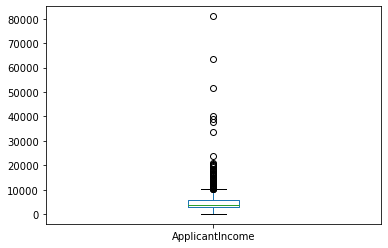

Observation : 
Some outliers are present near the whiskers and some are very far away from it,we will be removing them in further steps.


<Figure size 432x360 with 0 Axes>

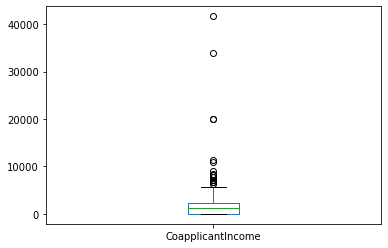

Observation : 
Some outliers are present near the whiskers and some are very far away from it,we will be removing them in further steps.


<Figure size 432x360 with 0 Axes>

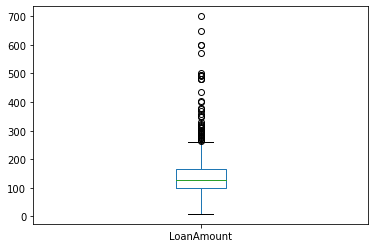

Observation : 
Some outliers are present near the whiskers and some are very far away from it,we will be removing them in further steps.


<Figure size 432x360 with 0 Axes>

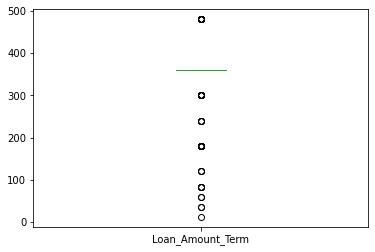

Observation : 
outliers present


In [125]:
for i in df_cont:
    plt.figure(figsize = [6,5])
    df_cont[[i]].plot.box()
    plt.show()
    x = input("Observation : \n")

In [126]:
from scipy.stats import zscore

In [127]:
z = np.abs(zscore(df_cont))

In [128]:
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [129]:
for i in df_cont:
    df[i] = df_cont[i]

In [130]:
df_new = df[(z<3).all(axis = 1)]

In [131]:
df_new.shape

(577, 13)

In [133]:
df.shape

(614, 13)

In [134]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.000000,70.0,360.0,1.0,Urban,Y


In [135]:
print(((614 - 577)/614)*100)

6.026058631921824


6 percent data lose

In [138]:
df_cont1 = df_new[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]]

<Figure size 432x360 with 0 Axes>

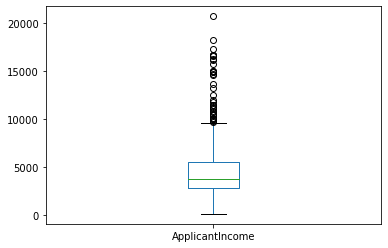

<Figure size 432x360 with 0 Axes>

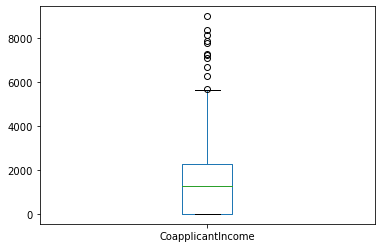

<Figure size 432x360 with 0 Axes>

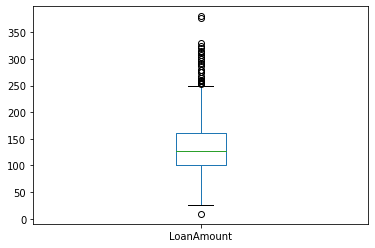

<Figure size 432x360 with 0 Axes>

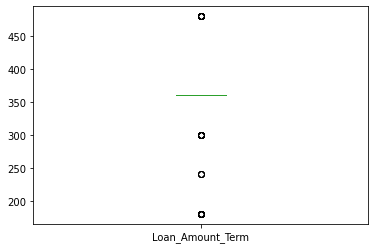

In [140]:
for i in df_cont1:
    plt.figure(figsize = [6,5])
    df_cont1[[i]].plot.box()
    plt.show()

most of the outliers are removed from dataset

In [142]:
#visualization for continous features

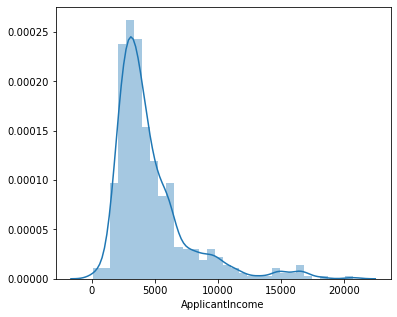

Observation : 
A little right skewed.


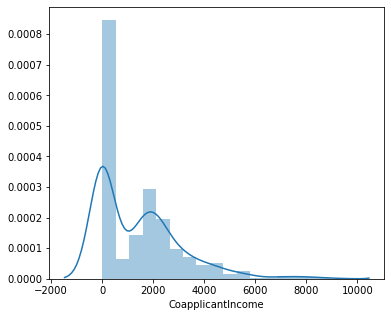

Observation : 
most of the data is concentrated over 0 CoapplicantIncome.


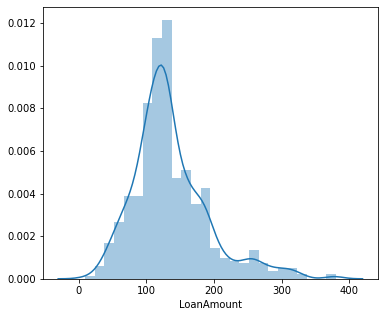

Observation : 
Almost equally distributed between 0 to 200 .Very little right skewed.


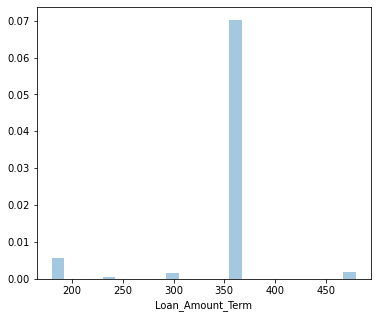

Observation : 
360 is the most frequent loan amount term.


In [143]:
for i in df_cont1:
    plt.figure(figsize = [6,5])
    plt.xlabel(i)
    sns.distplot(df_cont1[[i]],kde = True)
    plt.show()
    x = input("Observation : \n")

In [145]:
#using label encoder

In [147]:
df_cat = df_new[["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]]

In [148]:
from sklearn.preprocessing import LabelEncoder

In [237]:
le = LabelEncoder()

In [154]:
for i in df_cat:
    df_new[[i]] = le.fit_transform(df_cat[[i]])

In [155]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.000000,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.000000,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.000000,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.000000,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.000000,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.000000,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.000000,95.0,360.0,1.0,2,1
7,LP001014,1,1,3+,0,0,3036,2504.000000,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.000000,168.0,360.0,1.0,2,1
10,LP001024,1,1,2,0,0,3200,700.000000,70.0,360.0,1.0,2,1


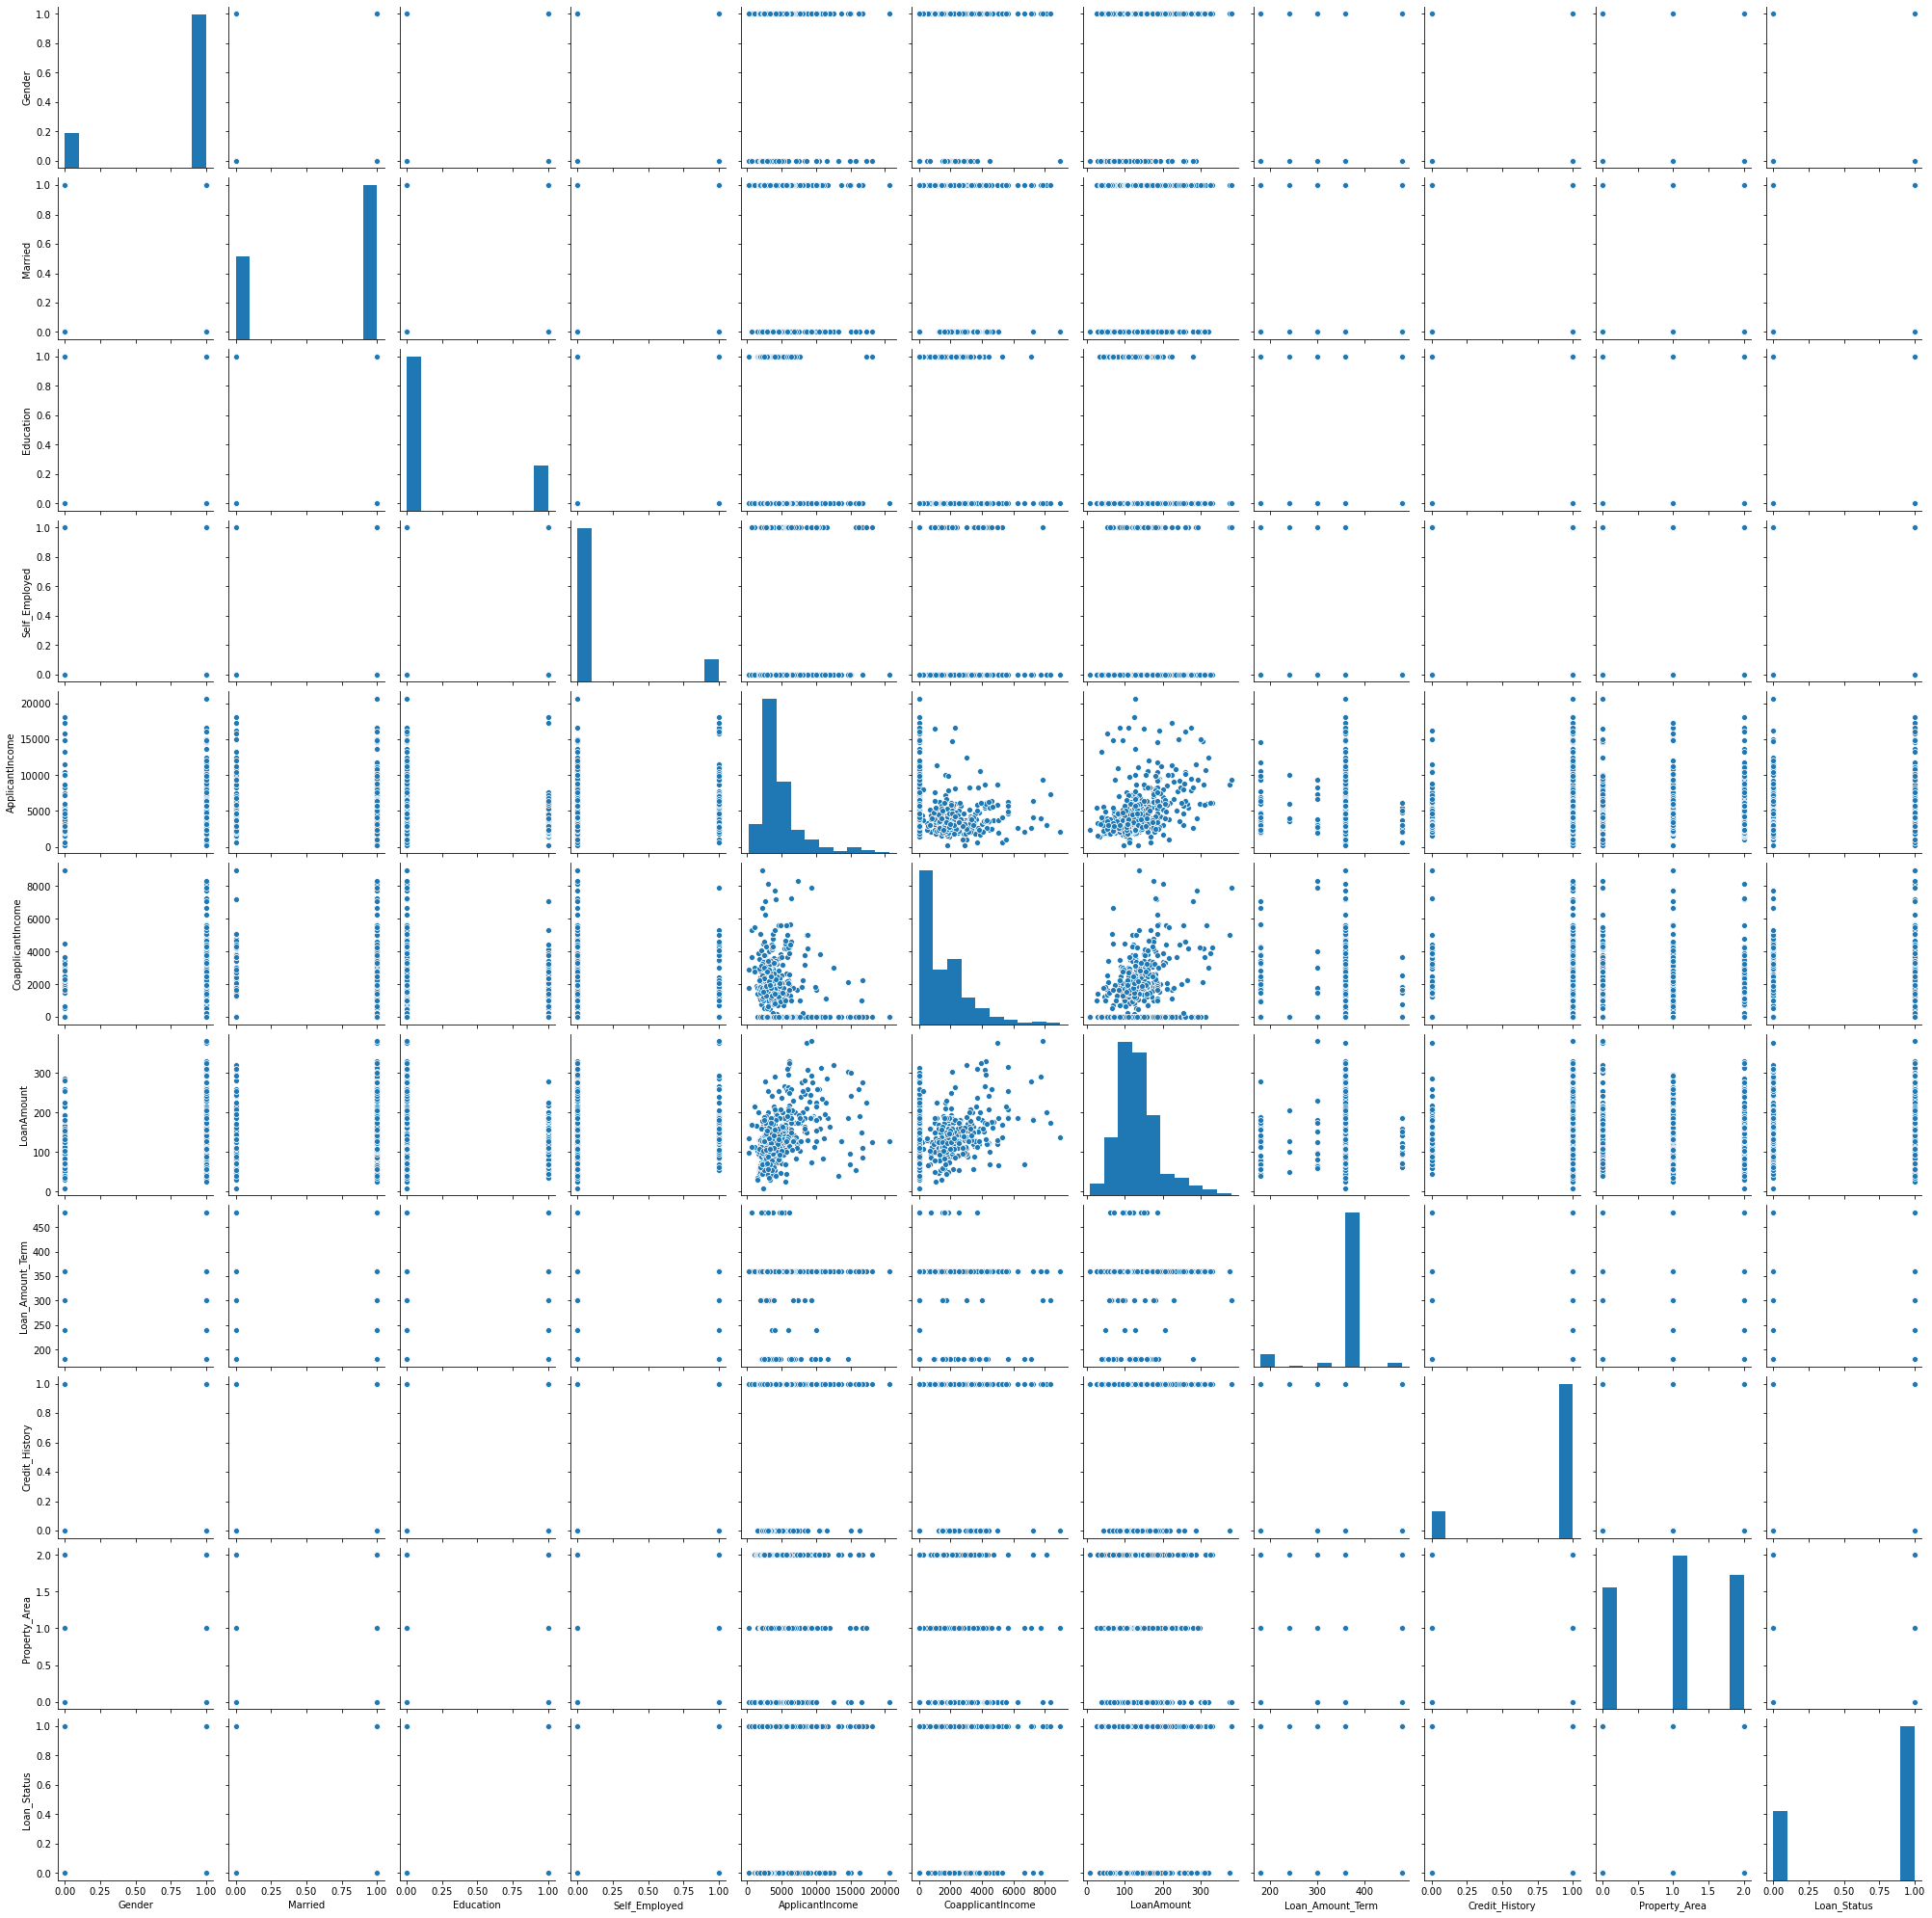

In [156]:
sns.pairplot(df_new)

array([1, 0])

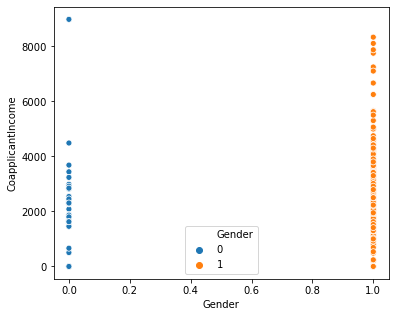

In [163]:
plt.figure(figsize = [6,5])
x = df_new["Gender"]
y = df_new["CoapplicantIncome"]
plt.xlabel("Gender")
plt.ylabel("Coapplicantincome")
sns.scatterplot(x,y , hue = df_new["Gender"])

Female(0) has less coapplicant income as compared to male(1).

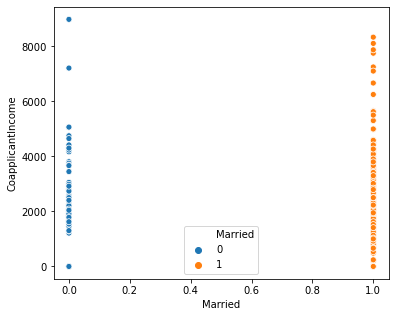

In [165]:
plt.figure(figsize = [6,5])
x = df_new["Married"]
y = df_new["CoapplicantIncome"]
plt.xlabel("Married")
plt.ylabel("Coapplicantincome")
sns.scatterplot(x,y , hue = df_new["Married"])

no(0) , yes(1)

Married indivisuals have more variety of coapplicant income as compared to unmarried indivisuals.

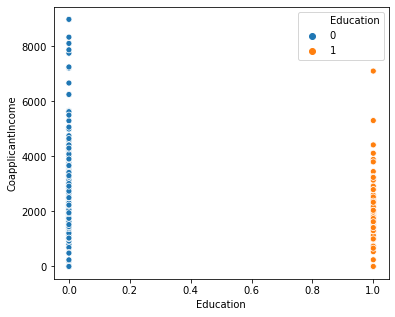

In [166]:
plt.figure(figsize = [6,5])
x = df_new["Education"]
y = df_new["CoapplicantIncome"]
plt.xlabel("Education")
plt.ylabel("Coapplicantincome")
sns.scatterplot(x,y , hue = df_new["Education"])

0 - graduates
1 - non-graduates

Graduates has more coapplicant income as compared to non- grauates

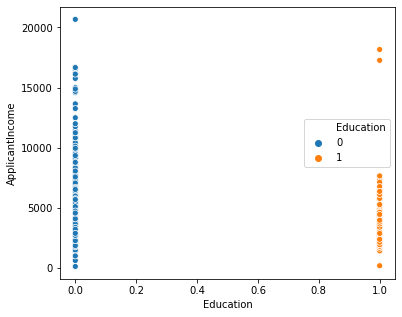

In [168]:
plt.figure(figsize = [6,5])
x = df_new["Education"]
y = df_new["ApplicantIncome"]
plt.xlabel("Education")
plt.ylabel("Applicantincome")
sns.scatterplot(x,y , hue = df_new["Education"])

0 - graduates 1 - non-graduates

Graduates has more Aapplicant income as compared to non- grauates.

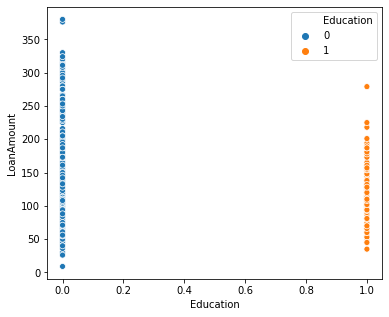

In [170]:
plt.figure(figsize = [6,5])
x = df_new["Education"]
y = df_new["LoanAmount"]
plt.xlabel("Education")
plt.ylabel("LoanAmount")
sns.scatterplot(x,y , hue = df_new["Education"])

Graduates has provided with more Loan amount income as compared to non- grauates.

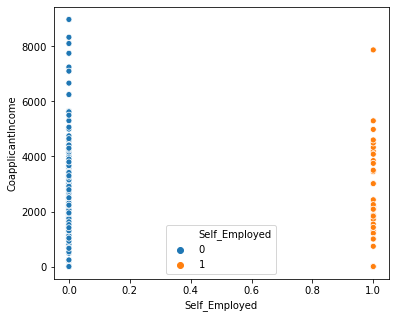

In [172]:
plt.figure(figsize = [6,5])
x = df_new["Self_Employed"]
y = df_new["CoapplicantIncome"]
plt.xlabel("Self_Employed")
plt.ylabel("CoapplicantIncome")
sns.scatterplot(x,y , hue = df_new["Self_Employed"])

no - 0
yes - 1

indivisuals who are not self employed has more coapplicant income as compared to self employed.

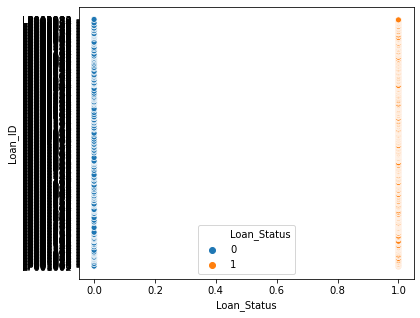

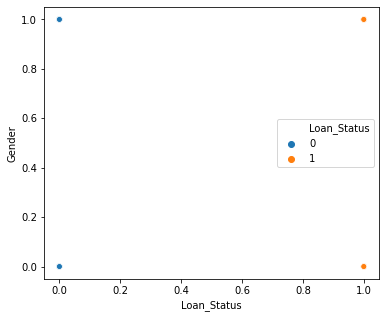

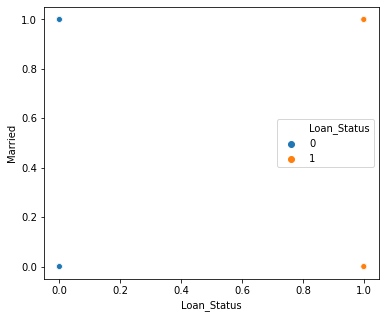

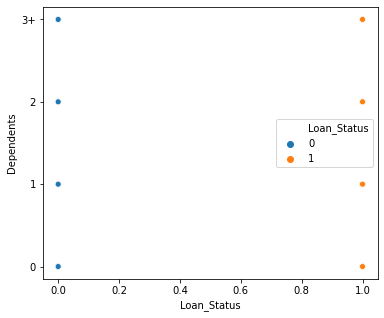

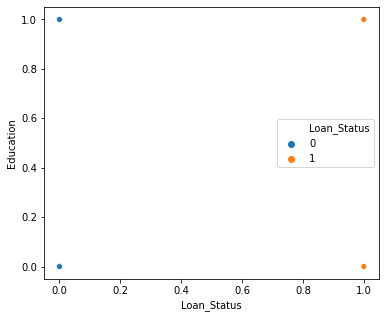

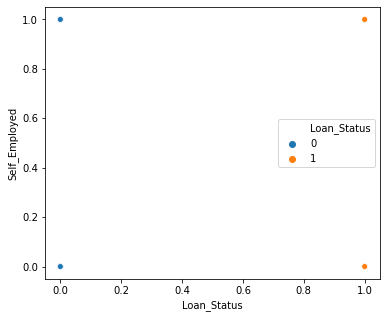

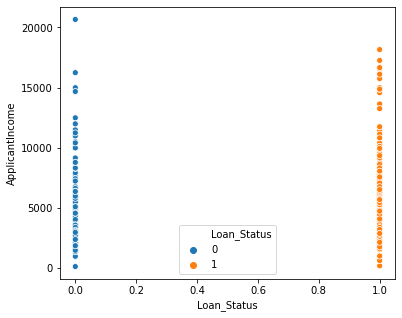

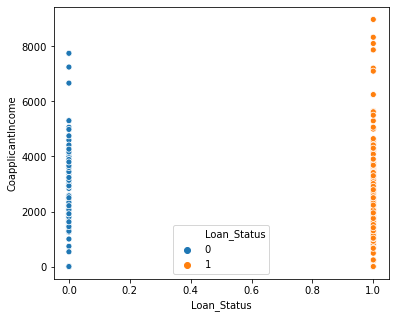

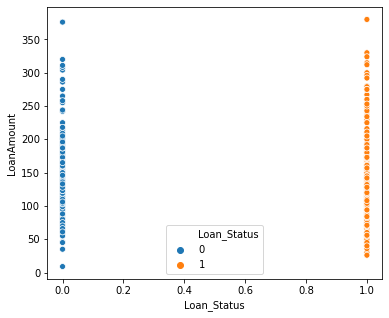

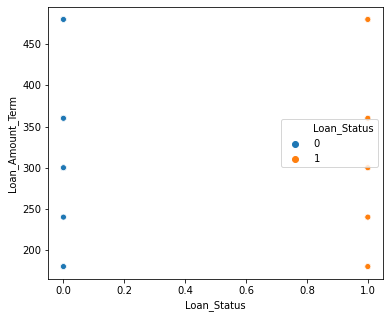

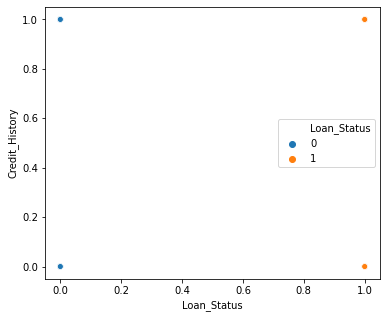

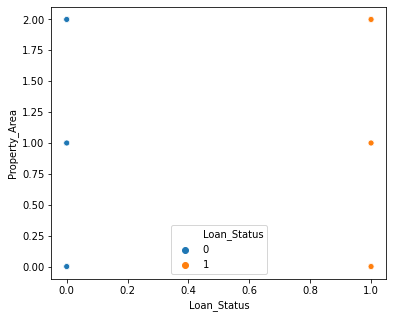

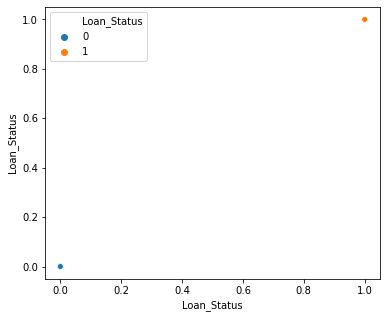

In [174]:
#checking relation with target variable
for i in df_new:
    plt.figure(figsize = [6,5])
    x = df_new["Loan_Status"]
    y = df_new[i]
    plt.xlabel("Loan_Status")
    plt.ylabel(i)
    sns.scatterplot(x,y , hue = df_new["Loan_Status"])

Y -1 , N-0

Observation : No such relationship among the taget feature and other variables.

In [214]:
#target feature analysis

In [215]:
df_new["Loan_Status"].unique()

array([1, 0])

In [217]:
df_new["Loan_Status"].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

The number of values of yes is almost double the values of No.(No class imbalance)

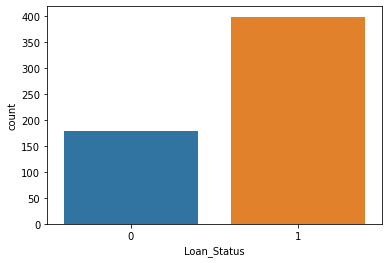

In [219]:
sns.countplot(df_new["Loan_Status"])

The number of values of yes is almost double the values of No.(No class imbalance)

In [176]:
#Checking correlation
corr_matrix = df_new.corr()

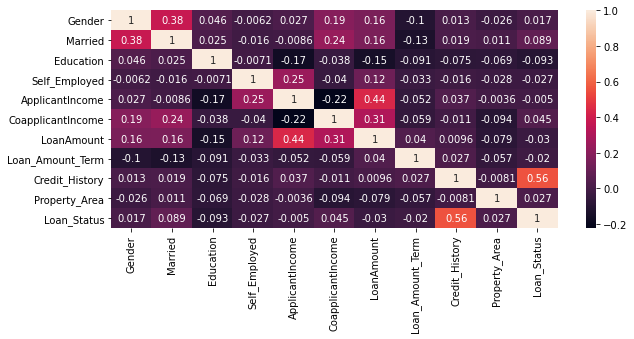

In [243]:
plt.figure(figsize = [10,4])
sns.heatmap(corr_matrix,annot = True)

In [178]:
corr_d = pd.DataFrame(corr_matrix)
corr_d

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.045696,-0.006207,0.026943,0.190543,0.158305,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.024817,-0.015779,-0.008567,0.237322,0.164694,-0.127348,0.019308,0.010595,0.089026
Education,0.045696,0.024817,1.000000,-0.007139,-0.166400,-0.037780,-0.149227,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,-0.007139,1.000000,0.250665,-0.039572,0.121650,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.026943,-0.008567,-0.166400,0.250665,1.000000,-0.220975,0.439405,-0.052101,0.036664,-0.003641,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.037780,-0.039572,-0.220975,1.000000,0.312623,-0.058726,-0.011102,-0.093505,0.045009
LoanAmount,0.158305,0.164694,-0.149227,0.121650,0.439405,0.312623,1.000000,0.039637,0.009591,-0.079181,-0.030333
Loan_Amount_Term,-0.104983,-0.127348,-0.090523,-0.032914,-0.052101,-0.058726,0.039637,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.075217,-0.016390,0.036664,-0.011102,0.009591,0.027392,1.000000,-0.008121,0.560936
Property_Area,-0.026340,0.010595,-0.068596,-0.028253,-0.003641,-0.093505,-0.079181,-0.057004,-0.008121,1.000000,0.026507


Most of the feature has correlation values less than 0.04.

In [180]:
#Checking correlation with target feature

In [181]:
corr=corr_matrix['Loan_Status'].sort_values(ascending = False)
corr = pd.DataFrame(corr)
corr

,Loan_Status
Loan_Status,1.000000
Credit_History,0.560936
Married,0.089026
CoapplicantIncome,0.045009
Property_Area,0.026507
Gender,0.017408
ApplicantIncome,-0.005003
Loan_Amount_Term,-0.020291
Self_Employed,-0.026525
LoanAmount,-0.030333


Credit history is highly correlated to loan status.Applicant income is least correlated to Loan status.

In [182]:
#checking skewness

In [183]:
#spliting the data n x and y 

In [201]:
x1 = df_new.drop(["Loan_Status"],axis = 1)

In [202]:
y = df_new["Loan_Status"]

In [203]:
x1.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.152064
Loan_Amount_Term    -2.810591
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

In [204]:
remove_skew2= df_new[["LoanAmount","Loan_Amount_Term","ApplicantIncome","CoapplicantIncome"]]

In [205]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
for i in remove_skew2:
    x1[i] = power.fit_transform(remove_skew2[[i]])

In [206]:
x1.skew()

Gender              -1.622920
Married             -0.630211
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048394
Loan_Amount_Term     0.728069
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Taking maximum skewed value between +/-7.

Also,Most of the features are categorical so, we dont remove skewness from those features.

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [212]:
ms = MinMaxScaler()
for i in remove_skew2:
    x1[i]= ms.fit_transform(x1[[i]])

In [213]:
x1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,0,0,0.716341,0.000000,0.552556,0.389013,1.0,2
1,LP001003,1,1,1,0,0,0.663827,0.745276,0.573414,0.389013,1.0,0
2,LP001005,1,1,0,0,1,0.574307,0.000000,0.379014,0.389013,1.0,2
3,LP001006,1,1,0,1,0,0.543202,0.805834,0.552556,0.389013,1.0,2
4,LP001008,1,0,0,0,0,0.721871,0.000000,0.605512,0.389013,1.0,2
5,LP001011,1,1,2,0,1,0.699743,0.887065,0.844802,0.389013,1.0,2
6,LP001013,1,1,0,1,0,0.522195,0.745980,0.480645,0.389013,1.0,2
7,LP001014,1,1,3+,0,0,0.576798,0.814134,0.644610,0.389013,0.0,1
8,LP001018,1,1,2,0,0,0.635166,0.746856,0.666298,0.389013,1.0,2
10,LP001024,1,1,2,0,0,0.587803,0.646094,0.394614,0.389013,1.0,2


Since Loan_ID has no relation with target variable or with any other variable therefore,we'll dropping the following column.

In [231]:
x1 = df_new.drop(["Loan_ID"],axis = 1)

In [238]:
x1["Dependents"] = le.fit_transform(x1["Dependents"])

In [239]:
x1.shape

(577, 12)

In [240]:
y.shape

(577,)

In [241]:
#for random_state check
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size =.20,random_state = i)
    le = LogisticRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = accuracy_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  1.0 at random state :  1


In [242]:
#taking random state as 1

In [244]:
x_train, x_test, y_train, y_test = train_test_split(x1,y,test_size =.20,random_state = 1)

In [245]:
#first using Logistic regression to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

1.0
[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

In [246]:
#using aoc roc curve to check how efficiently model is learning

In [247]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = lr.predict_proba(x_test)[:,1]

In [248]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

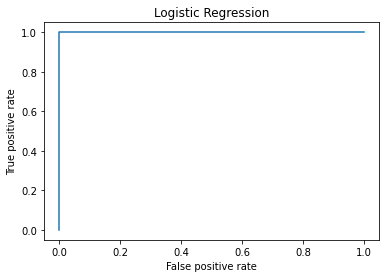

In [250]:
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

as we can see that the area under the curve for logistic regression is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [251]:
#Using Random Forest Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

1.0
[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

In [257]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [258]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

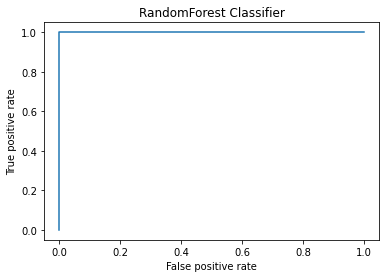

In [267]:
#plottig the aoc roc graph
plt.plot(fpr,tpr,label = 'RandomForest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForest Classifier')
plt.show()

as we can see that the area under the curve for RandomForest Classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [256]:
#Using DecisionTree Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

1.0
[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

In [260]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

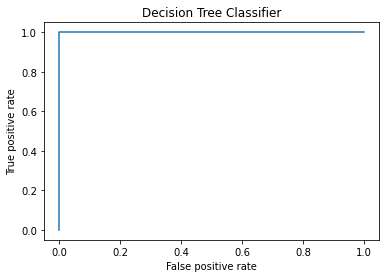

In [261]:
plt.plot(fpr,tpr,label = 'Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()

as we can see that the area under the curve for Decision tree classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [289]:
#Using Support Vector Classifier to check the accuracy of the model,with the help of accuracy score,confusion matrix and classification report
from sklearn.svm import SVC
svc = SVC(kernel = "linear")
svc.fit(x_train,y_train)
prdsvc = svc.predict(x_test)
print(accuracy_score(y_test,prdsvc))
print(confusion_matrix(y_test,prdsvc))
print(classification_report(y_test,prdsvc))

1.0
[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

In [265]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

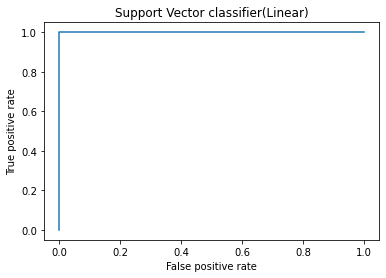

In [268]:
plt.plot(fpr,tpr,label = 'Support Vector classifier(Linear)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector classifier(Linear)')
plt.show()

as we can see that the area under the curve for Support Vector classifier(Linear) is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

In [270]:
#checking accuracy of support vector machine on different kernels.

In [273]:
kernelsvc = ["rbf","poly"]
for i in kernelsvc:
    svc = SVC(kernel = i)
    svc.fit(x_train,y_train)
    prdsvc = svc.predict(x_test)
    print("Showing result for Support Vector Classification Model : ", i)
    print(accuracy_score(y_test,prdsvc))
    print(confusion_matrix(y_test,prdsvc))
    print(classification_report(y_test,prdsvc)) 

Showing result for Support Vector Classification Model :  rbf
0.7155172413793104
[[ 0 33]
 [ 0 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.83        83

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.51      0.72      0.60       116

Showing result for Support Vector Classification Model :  poly
0.7155172413793104
[[ 0 33]
 [ 0 83]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.72      1.00      0.83        83

    accuracy                           0.72       116
   macro avg       0.36      0.50      0.42       116
weighted avg       0.51      0.72      0.60       116



Observation: Looking at both the models we concluded that neither of the model is learning for 0 class. All the values for 0 class is classified as false positive by the model.
    Thats why the precision,recall and f1 score is 0 for this class.So we can say that model is not learning effectively.

In [274]:
#using boosting technique to build model
from sklearn.ensemble import GradientBoostingClassifier

In [275]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
prdgbc = gbc.predict(x_test)
print(accuracy_score(y_test,prdgbc))
print(confusion_matrix(y_test,prdgbc))
print(classification_report(y_test,prdgbc))

1.0
[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



Observation: The accuracy of the model is 100 percent .

The model Learning: Precision value(positive predictive value) for 0 is 100% whereas the Precision value for 1 is also 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which implies model is 100 efficient.also there are no false positive and true negatives present in the confusion matrix.

In [276]:
#using aoc roc curve to check how efficiently model is learning
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_prob = gbc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

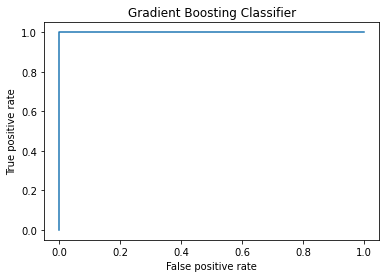

In [277]:
plt.plot(fpr,tpr,label = 'Gradient Bossting Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Gradient Boosting Classifier')
plt.show()

as we can see that the area under the curve for Gradient boosting classifier is maximum , it covers complete x,y plane, therefore, we can conclude that the model learning is 100 percent.

Conclusion : Almost the models we tested for model building shows 100 percent accuracy.So we'll use cross validation score to check which model is actually learning efficiently.

In [281]:
#using cross validation score to check the actual learning of models

In [282]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x1,y,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean())

Cross validation score of Logistic Regression is  0.9947826086956522


In [283]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(dtc,x1,y,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  1.0


In [285]:
scr = cross_val_score(rfc,x1,y,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  1.0


In [290]:
scr = cross_val_score(svc,x1,y,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  0.9947826086956522


In [291]:
scr = cross_val_score(gbc,x1,y,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  1.0


Conclusion: From the above cross validation scores of different models we conclude that Desicion tree classifier , Random forest classifier and gradient bosting classifier shows same cross validation score.So we can choose any of the model.

Choosing Random forest classifier model

In [292]:
#doing Hyperparameter tuning of random forest

In [293]:
from sklearn.model_selection import GridSearchCV

In [298]:
#creating parameter list to pass in GridSearchCV
parameters = {'n_estimators' : [10,100],
              'max_depth' : np.arange(2,7),
             'criterion': ['gini','entropy'],
             'max_features': ['auto','sqrt','log2']}  

In [299]:
GVC = GridSearchCV(RandomForestClassifier(),parameters,cv = 5)

In [300]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]})

In [305]:
#checking the best parameters
GVC.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 100}

In [306]:
#using the parameters in random forest classifier to create model
modrfc = RandomForestClassifier(criterion = 'gini',max_depth = 2,max_features = 'auto',n_estimators = 100,random_state = 1)
modrfc.fit(x_train,y_train)
pred = modrfc.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 100.0


The accuracy of the Random forest classifier model is 100 percent on the given parameters.

In [307]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[33  0]
 [ 0 83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        83

    accuracy                           1.00       116
   macro avg       1.00      1.00      1.00       116
weighted avg       1.00      1.00      1.00       116



In [308]:
#checking the accuracy of the model.

In [309]:
conclusion = pd.DataFrame([modrfc.predict(x_test)[:],prdtc[:]],index = ["predicted","original"])

In [310]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
predicted,1,1,1,1,1,0,0,0,1,1,...,1,1,1,0,1,1,0,1,1,0
original,1,1,1,1,1,0,0,0,1,1,...,1,1,1,0,1,1,0,1,1,0


The predicted and original values are exact same.

In [313]:
#saving the model using jobib
import joblib
joblib.dump(modrfc,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']